In [1]:
#try to layer or to stack!

In [3]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import pywt
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
img_name = 'DSC_7653'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


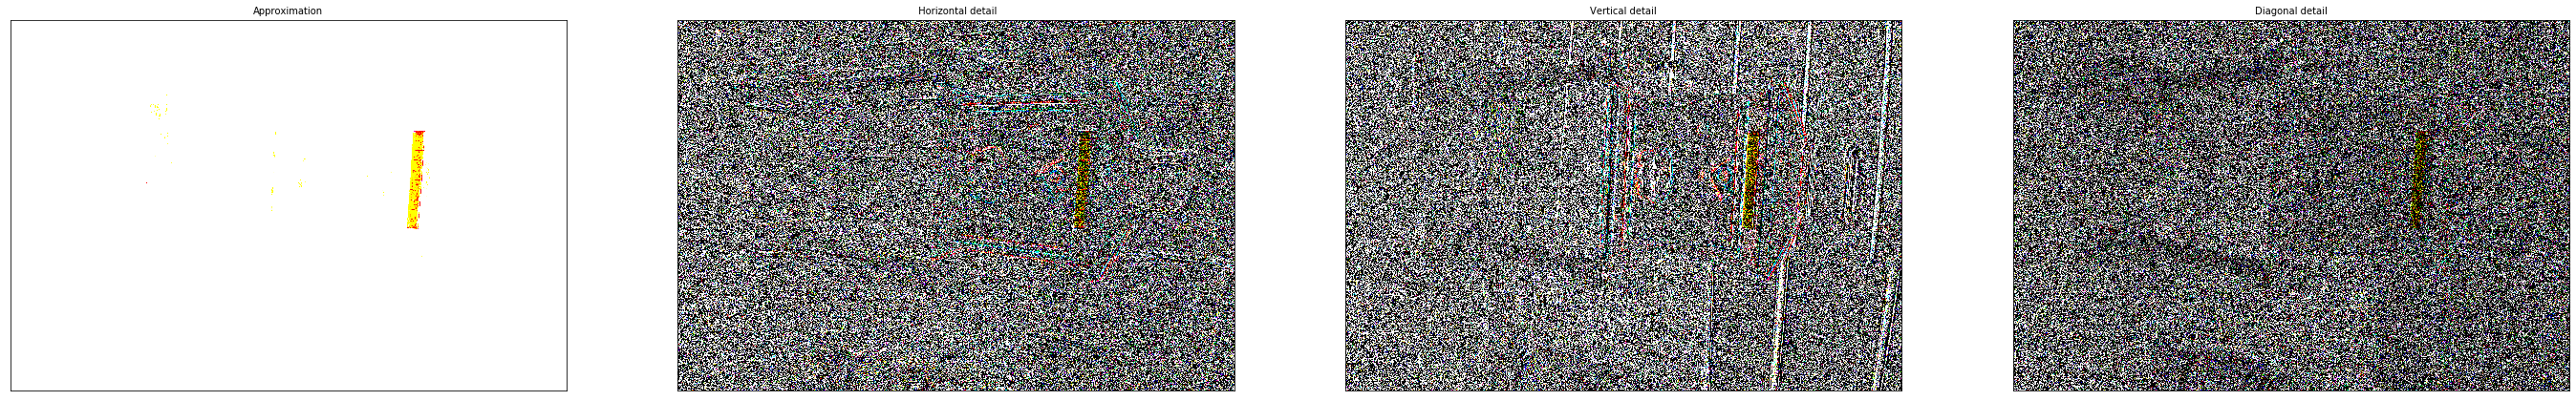

In [13]:
data_img = np.asarray(Image.open(f"data/{img_name}.jpg"))
r = data_img[:,:,0]
g = data_img[:,:,1]
b = data_img[:,:,2]
    
coeff_r = pywt.dwt2(r, 'bior1.3')
coeff_g = pywt.dwt2(g, 'bior1.3')
coeff_b = pywt.dwt2(b, 'bior1.3')
    
LL_r, (LH_r, HL_r, HH_r) = coeff_r
LL_g, (LH_g, HL_g, HH_g) = coeff_g
LL_b, (LH_b, HL_b, HH_b) = coeff_b
#LL_g.shape
LL_all = np.stack((LL_r,LL_g,LL_b),axis=2)
LH_all = np.stack((LH_r,LH_g,LH_b),axis=2)
HL_all = np.stack((HL_r,HL_g,HL_b),axis=2)
HH_all = np.stack((HH_r,HH_g,HH_b),axis=2)

titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL_all, LH_all, HL_all, HH_all]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    
#can see details very well in this view
    
#Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
#so better use astype (?)
### TRY Below

#Aber die waren vorher auch keine ints, niemand beschwerte sich?!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


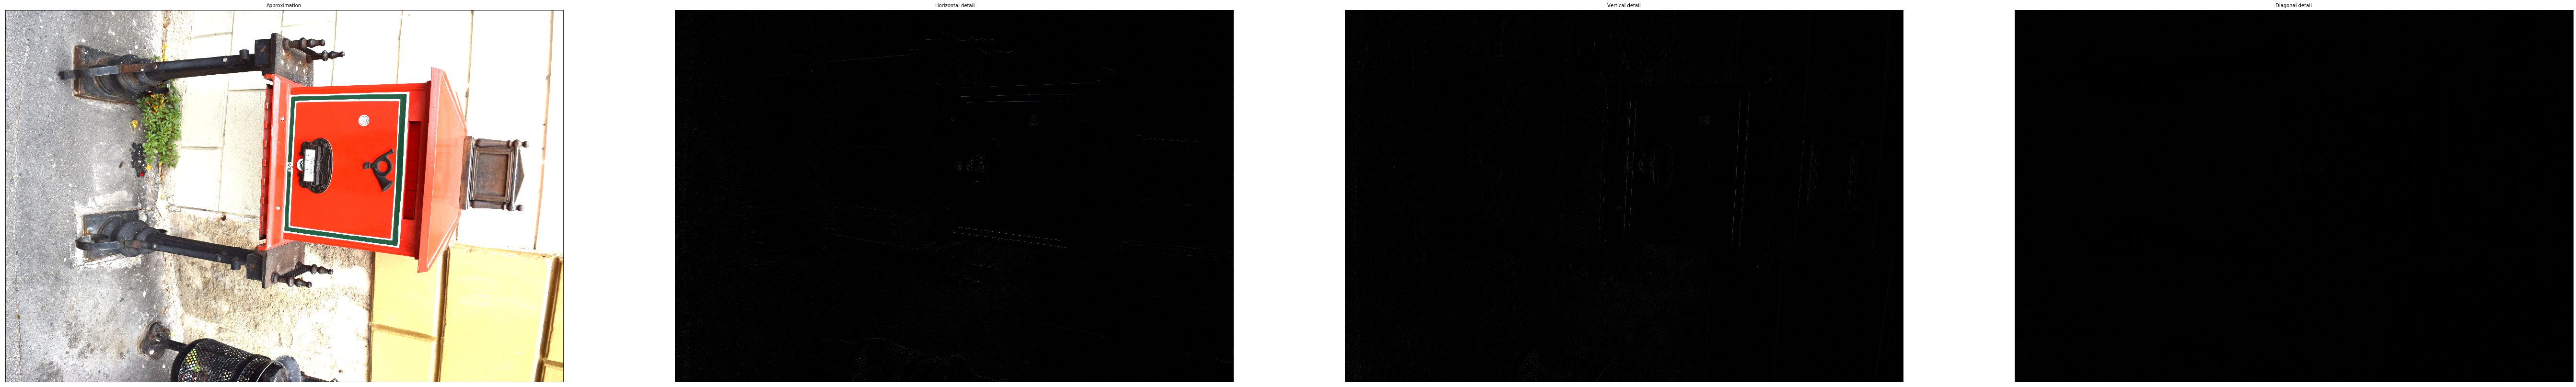

In [17]:
data_img = np.asarray(Image.open(f"data/{img_name}.jpg"))
r = data_img[:,:,0]
g = data_img[:,:,1]
b = data_img[:,:,2]
    
coeff_r = pywt.dwt2(r, 'bior1.3')
coeff_g = pywt.dwt2(g, 'bior1.3')
coeff_b = pywt.dwt2(b, 'bior1.3')
    
LL_r, (LH_r, HL_r, HH_r) = coeff_r
LL_g, (LH_g, HL_g, HH_g) = coeff_g
LL_b, (LH_b, HL_b, HH_b) = coeff_b


titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
fig = plt.figure(figsize=(96, 24))
for i, a in enumerate([LL_all.astype(int), LH_all.astype(int), HL_all.astype(int), HH_all.astype(int)]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    
    #why how would this help to make it colourful?
    
    #used all colours
    #este ist normale (apprX)

In [19]:
#was sagen mir die lh hl hh werte, denn ll ist dieapprox ans bild deswegen sieht sie so gut aus, vielleicht muss man die anderen adneres runden, oder so lassen
#werte sind von imshow so interpretierbar?
#werte von  zb  HL_r sind nicht [0,255]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


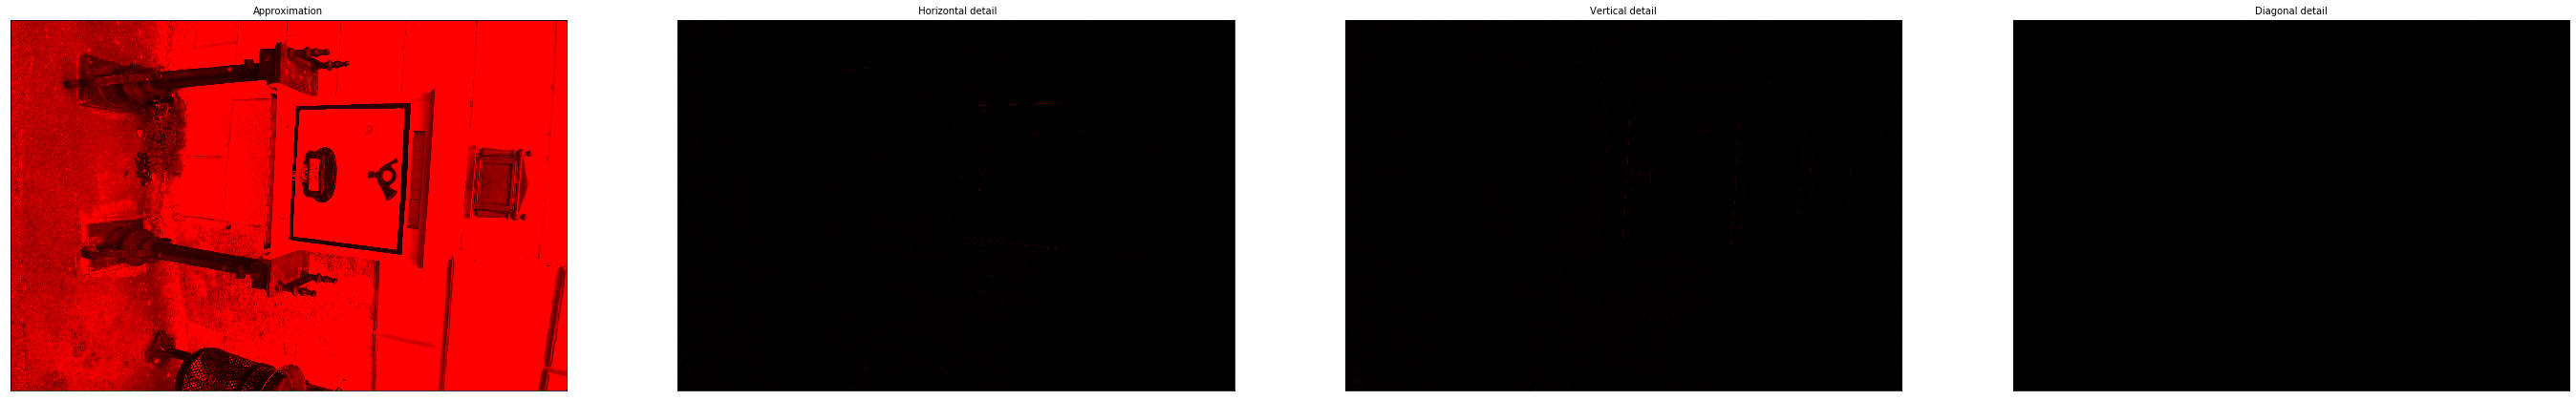

In [31]:
data_img = np.asarray(Image.open(f"data/{img_name}.jpg"))
r = data_img[:,:,0]
g = data_img[:,:,1]
b = data_img[:,:,2]
    
coeff_r = pywt.dwt2(r, 'bior1.3')
#coeff_g = pywt.dwt2(g, 'bior1.3')
#coeff_b = pywt.dwt2(b, 'bior1.3')
    
LL_r, (LH_r, HL_r, HH_r) = coeff_r
#LL_g, (LH_g, HL_g, HH_g) = coeff_g
#LL_b, (LH_b, HL_b, HH_b) = coeff_b

#First for R:
g_llr_r=b_llr_r=np.zeros(LL_r.shape)
g_lhr_r=b_lhr_r=np.zeros(LH_r.shape)
g_hlr_r=b_hlr_r=np.zeros(HL_r.shape)
g_hhr_r=b_hhr_r=np.zeros(HH_r.shape)
#maybe only convert the LL? let the rest be the same?!


LL_real_r=np.stack((LL_r,g_llr_r,b_llr_r),axis=2)
LH_real_r=np.stack((LH_r,g_lhr_r,b_lhr_r),axis=2)
HL_real_r=np.stack((HL_r,g_hlr_r,b_hlr_r),axis=2)
HH_real_r=np.stack((HH_r,g_hhr_r,b_hhr_r),axis=2)


titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
fig = plt.figure(figsize=(48, 12))
for i, a in enumerate([LL_real_r.astype(int), LH_real_r.astype(int), HL_real_r.astype(int), HH_real_r.astype(int)]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
    


In [ ]:
#safe images within python, sd wo hin exportieren kann